# Problem Set 2

## Question 4

(BH 26.12) Use the cps09mar dataset and the subset of men. Estimate a multinomial logit model for
marriage status similar to Figure 26.1 as a function of age. How do your findings compare with those for
women?

In [3]:
import os
import sys
import numpy as np
import pandas as pd

cps09mar = pd.read_stata('https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta')

In [5]:
df = cps09mar
df['married'] = (df['marital']<=4)*1
df['divorced'] = (df['marital']==5)*1
df['seperated'] = (df['marital']==6)*1
df['never'] = (df['marital']==7)*1

In [82]:
def log_f(beta,data):
    """
    See BH page 832.
    
    beta = (b1=beta_m,b2=beta_d,b3=beta_s,b4=beta_n)
    """
    P1 = np.exp(beta[0] + beta[1]*data.age)
    P2 = np.exp(beta[2] + beta[3]*data.age)
    P3 = np.exp(beta[4] + beta[5]*data.age)
    P4 = np.exp(beta[6]*data.age)
    denom = P1+P2+P3+P4
    l_i = (data.married*P1 + data.divorced*P2 
           + data.seperated*P3 + data.never*P4)/denom
    return np.sum(l_i)

/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


7 -11.31578947368421 -22315.999924462485 [-949.95027864   18.64058881  -11.92755767  -26.24548903  -11.74064079
  -21.59130858  -16.08028208]


<AxesSubplot: xlabel='age'>

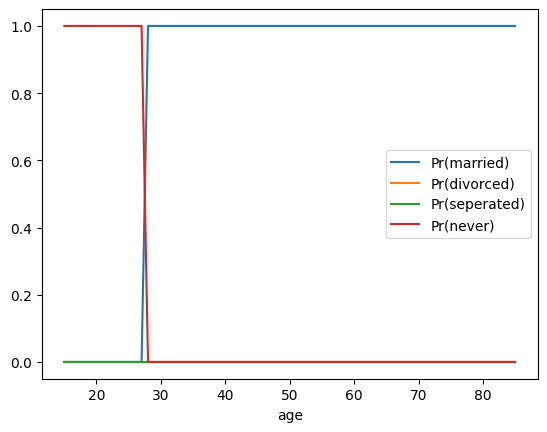

In [129]:
from scipy.optimize import minimize
# subset
df = cps09mar.loc[cps09mar.female==0].copy()

# optimization
def l(beta):  # beta as the only input (for minimize(-ll))
    return -log_f(beta, data=df)
init = np.linspace(-15,-5,20)
res = []
for i,b0 in enumerate(init):
    opt = minimize(l, [b0]*7, method = 'L-BFGS-B')
    res.append(opt)
Q_min = np.argmin([o.fun for o in res])
opt = res[Q_min]
print(Q_min, init[Q_min], opt.fun, opt.x)
beta_hat = opt.x

# generate results
df['exp1'] = np.exp(beta_hat[0]+beta_hat[1]*df['age'])
df['exp2'] = np.exp(beta_hat[2]+beta_hat[3]*df['age'])
df['exp3'] = np.exp(beta_hat[4]+beta_hat[5]*df['age'])
df['exp4'] = np.exp(beta_hat[6]*df['age'])
df['denom'] = df['exp1'] + df['exp2'] + df['exp3'] + df['exp4']
df['Pr(married)'] = df['exp1'] / df['denom']
df['Pr(divorced)'] = df['exp2'] / df['denom']
df['Pr(seperated)'] = df['exp3'] / df['denom']
df['Pr(never)'] = df['exp4'] / df['denom']

# plot
df_unique = df[df.age.duplicated()==False].sort_values('age')
df_unique.plot('age',['Pr(married)','Pr(divorced)','Pr(seperated)','Pr(never)'])

In [117]:
init

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [120]:
init[Q_min]

1.0

In [114]:
opt.x

array([1.01883436, 1.83697825, 0.99246455, 0.68322313, 0.98989147,
       0.5619929 , 0.91780571])

<AxesSubplot: xlabel='age'>

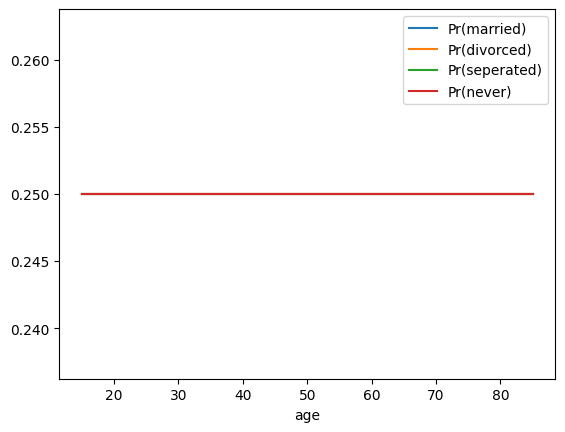

/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='age'>

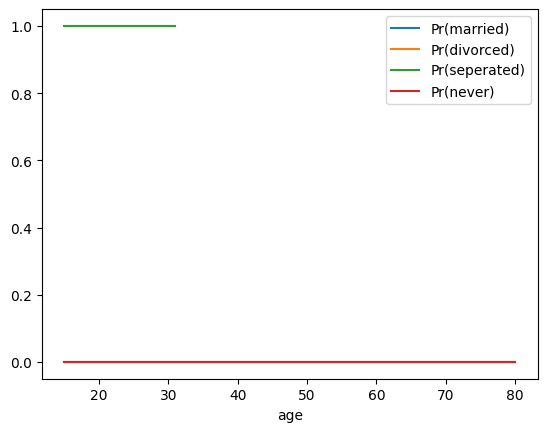

In [130]:
df = cps09mar.loc[cps09mar.female==1].copy()
def l(beta):  # beta as the only input (for minimize())
    return log_f(beta, data=df)
opt = minimize(l, [0.1]*7, method = 'BFGS')
beta_hat = opt.x
df['exp1'] = np.exp(beta_hat[0]+beta_hat[1]*df['age'])
df['exp2'] = np.exp(beta_hat[2]+beta_hat[3]*df['age'])
df['exp3'] = np.exp(beta_hat[4]+beta_hat[5]*df['age'])
df['exp4'] = np.exp(beta_hat[6]*df['age'])
df['denom'] = df['exp1'] + df['exp2'] + df['exp3'] + df['exp4']
df['Pr(married)'] = df['exp1'] / df['denom']
df['Pr(divorced)'] = df['exp2'] / df['denom']
df['Pr(seperated)'] = df['exp3'] / df['denom']
df['Pr(never)'] = df['exp4'] / df['denom']
df_unique = df[df.age.duplicated()==False].sort_values('age')
df_unique.plot('age',['Pr(married)','Pr(divorced)','Pr(seperated)','Pr(never)'])

In [62]:
res = []
for i,init in enumerate([-0.1, -0.05, 0, 0.5, 1]):
    opt = minimize(l, [init]*7, method='BFGS')
    res.append(opt.fun)

/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wonjun/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wonjun/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/wonjun/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wonjun/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f

In [63]:
res

[-538.875065821317,
 -2957.17516319687,
 -21602.0,
 -4.3582989471928115e+18,
 -9.981172140037766e+35]